In [52]:
import pandas as pd

file_path = '/Users/meredithsmith/Desktop/TØPAnalysis/11GoodTØPTours.xlsx'
df= pd.read_excel(file_path)

In [53]:
geo = '/Users/meredithsmith/Desktop/TØPAnalysis/geocoded_cities.xlsx'
df_geo = pd.read_excel(geo, usecols = [0,1,2])

In [54]:
# 2. Rename the first column (index 0) to 'location_string'
df_geo.columns.values[0] = 'location_string'
df_geo.columns.values[1] = 'latitude'
df_geo.columns.values[2] = 'longitude'

In [55]:
df_geo.columns

Index(['location_string', 'latitude', 'longitude'], dtype='object')

In [56]:
df_geo.info

<bound method DataFrame.info of              location_string   latitude   longitude
0          Columbus, OH, USA  39.962260  -83.000707
1         Kettering, OH, USA  39.689504  -84.168827
2         Cleveland, OH, USA  41.499657  -81.693677
3            Canton, OH, USA  40.798546  -81.374951
4        Middletown, OH, USA  39.516644  -84.404173
..                       ...        ...         ...
400    \tAlpharetta, GA, USA  34.075596  -84.294596
401  \tBirmingham\t, AL, USA  33.520682  -86.802433
402        \tRogers, AR, USA  36.334857  -94.119382
403      \tDallas\t, TX, USA  32.776272  -96.796856
404   \tChula Vista, CA, USA  32.640054 -117.084195

[405 rows x 3 columns]>

In [57]:
df_geo.columns

Index(['location_string', 'latitude', 'longitude'], dtype='object')

In [58]:
df.info

<bound method DataFrame.info of                                      Members  \
0     Tyler Joseph, Nick Thomas, Chris Salih   
1     Tyler Joseph, Nick Thomas, Chris Salih   
2     Tyler Joseph, Nick Thomas, Chris Salih   
3     Tyler Joseph, Nick Thomas, Chris Salih   
4     Tyler Joseph, Nick Thomas, Chris Salih   
...                                      ...   
1061                  Tyler Joseph, Josh Dun   
1062                  Tyler Joseph, Josh Dun   
1063                  Tyler Joseph, Josh Dun   
1064                  Tyler Joseph, Josh Dun   
1065                  Tyler Joseph, Josh Dun   

                         Associated Albums                 Date  \
0                                      NaN  2009-07-08 00:00:00   
1                                      NaN  2009-10-11 00:00:00   
2                                      NaN  2009-12-29 00:00:00   
3     Twenty Øne Pilots (Self-Titled)       2010-01-16 00:00:00   
4     Twenty Øne Pilots (Self-Titled)       2010-02-19 0

https://www.geeksforgeeks.org/data-analysis/data-cleansing-introduction/

#### Identify Column Data Types

In [59]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print('Categorical columns:', cat_col)
print('Numerical columns:', num_col)

Categorical columns: ['Members', 'Associated Albums', 'Date', 'Tour', 'City ', 'State', 'Country', 'Continent', 'Venue', 'Suffix', 'Lineup', 'Signed Under', 'Unnamed: 14']
Numerical columns: ['Unnamed: 4', 'Legs']


#### Count Unique Values

In [60]:
df[cat_col].nunique()

Members                 2
Associated Albums       8
Date                 1025
Tour                   97
City                  448
State                  55
Country                67
Continent               9
Venue                 855
Suffix                  8
Lineup                 22
Signed Under            2
Unnamed: 14            15
dtype: int64

#### Calculate Missing Values as Percentage

In [61]:
round((df.isnull().sum() / df.shape[0]) * 100, 2)

Members                0.66
Associated Albums      1.22
Date                   0.00
Tour                  28.52
Unnamed: 4           100.00
City                   2.63
State                 29.92
Country                2.16
Continent              2.06
Venue                  0.84
Suffix                92.03
Legs                   2.25
Lineup                96.62
Signed Under          95.97
Unnamed: 14           98.50
dtype: float64

### Drop Irrelevant or Data - Heavy Missing Columns

In [62]:
df1 = df.drop(columns=['Unnamed: 4', 'Suffix', 'Lineup', 'Signed Under', 'Unnamed: 14'])


In [63]:
df1.dtypes

Members               object
Associated Albums     object
Date                  object
Tour                  object
City                  object
State                 object
Country               object
Continent             object
Venue                 object
Legs                 float64
dtype: object

In [64]:
df1.columns = df1.columns.str.strip()

In [65]:
df1.head()

,Members,Associated Albums,Date,Tour,City,State,Country,Continent,Venue,Legs
0,"Tyler Joseph, Nick Thomas, Chris Salih",NaN,2009-07-08 00:00:00,NaN,Columbus,OH,USA,North America,Expresso Yourself Music Café,1.0
1,"Tyler Joseph, Nick Thomas, Chris Salih",NaN,2009-10-11 00:00:00,NaN,Columbus,OH,USA,North America,Battle of the Bands at the Alrosa Villa,1.0
2,"Tyler Joseph, Nick Thomas, Chris Salih",NaN,2009-12-29 00:00:00,NaN,Columbus,OH,USA,North America,The Basement,1.0
3,"Tyler Joseph, Nick Thomas, Chris Salih",Twenty Øne Pilots (Self-Titled),2010-01-16 00:00:00,NaN,Columbus,OH,USA,North America,Newport Music Hall,1.0
4,"Tyler Joseph, Nick Thomas, Chris Salih",Twenty Øne Pilots (Self-Titled),2010-02-19 00:00:00,NaN,Columbus,OH,USA,North America,Newport Music Hall,1.0


In [66]:
# Returns a count of every date associated with each tour
tour_counts = df1['Tour'].value_counts()
tour_counts

Tour
The Bandito Tour                                     118
Blurryface World Tour                                 92
The Emotional Roadshow World Tour                     89
The Clancy Tour                                       69
The Quiet is Violent World Tour 2014                  41
                                                    ... 
BBC Radio 1 Live Lounge (Recorded September 2018)      1
Trip for Concerts Spring 2016                          1
A Complete Diversion                                   1
ARTOPIA                                                1
Boston Calling                                         1
Name: count, Length: 97, dtype: int64

In [67]:
# Groups by Tour and counts the number of entries in the Date column
tour_summary = df1.groupby('Tour')['Date'].count().reset_index()
tour_summary.columns = ['Tour', 'Number_of_Dates']
print(tour_summary)

                                           Tour  Number_of_Dates
0                           2015-07-14 00:00:00                1
1                           2020-06-19 00:00:00                1
2                           2020-06-20 00:00:00                1
3                           2020-06-21 00:00:00                1
4                           2020-06-25 00:00:00                1
..                                          ...              ...
92                Trip for Concerts Winter 2013               20
93  Trip for Concerts Winter 2014 European Tour               21
94           WKQX The Nights We Stole Christmas                1
95                  iHeart Radio ALTer Ego 2019                1
96         Scaled and Icy Livestream Experience                1

[97 rows x 2 columns]


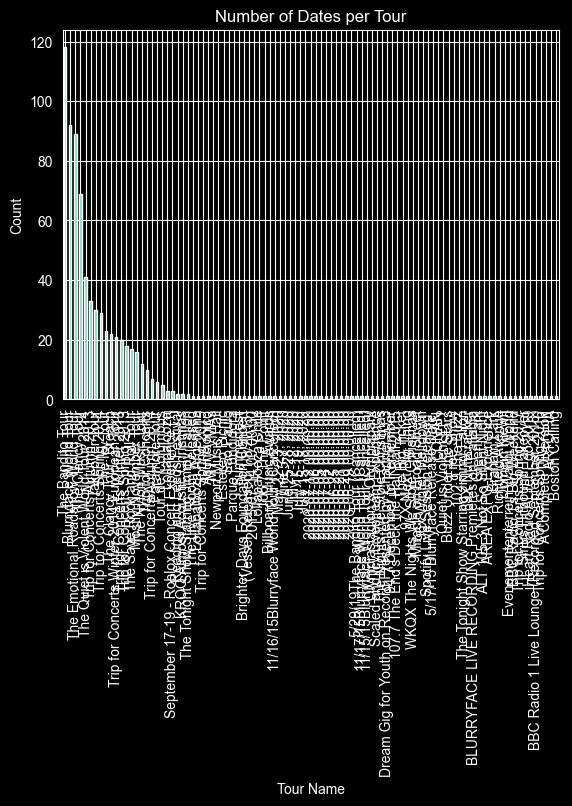

In [68]:
import matplotlib.pyplot as plt

df1['Tour'].value_counts().plot(kind='bar')
plt.title('Number of Dates per Tour')
plt.xlabel('Tour Name')
plt.ylabel('Count')
plt.show()

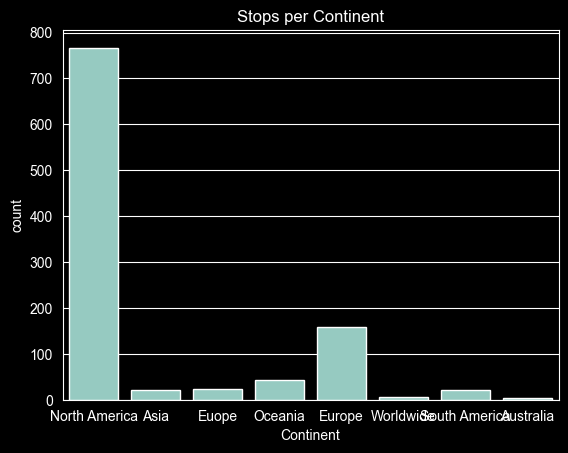

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Strip leading/trailing whitespace and tabs from the continent column
df1['Continent'] = df1['Continent'].str.strip()

# Now plot again
sns.countplot(data=df1, x='Continent')
plt.title('Stops per Continent')
plt.show()

In [70]:
import pandas as pd

# Grouping by continent and summing the population
continent_stats = df1.groupby('Continent')['Legs'].sum().reset_index()

print(continent_stats)

       Continent   Legs
0           Asia   21.0
1      Australia    4.0
2          Euope   24.0
3         Europe  158.0
4  North America  764.0
5        Oceania   43.0
6  South America   21.0
7      Worldwide    6.0


              Country   Legs
0      Allianz Parque    1.0
1           Argentina    5.0
2           Australia   40.0
3             Austria    7.0
4             Belgium   10.0
5              Brazil    5.0
6              Canada   35.0
7               Chile    4.0
8               China    2.0
9            Colombia    3.0
10     Czech Republic    4.0
11            Denmark    3.0
12            England    5.0
13      Farmasi Arena    1.0
14            Finland    2.0
15             France   15.0
16            Germany   25.0
17            Hungary    1.0
18            Ireland    4.0
19              Italy    7.0
20              Japan   10.0
21              Korea    2.0
22             Latvia    1.0
23             Mexico   15.0
24        Netherlands   12.0
25        New Zealand    7.0
26             Norway    4.0
27           Paraguay    2.0
28        Philippines    2.0
29             Poland    3.0
30           Portugal    1.0
31  Republic of Korea    1.0
32             Russia    4.0
33           S

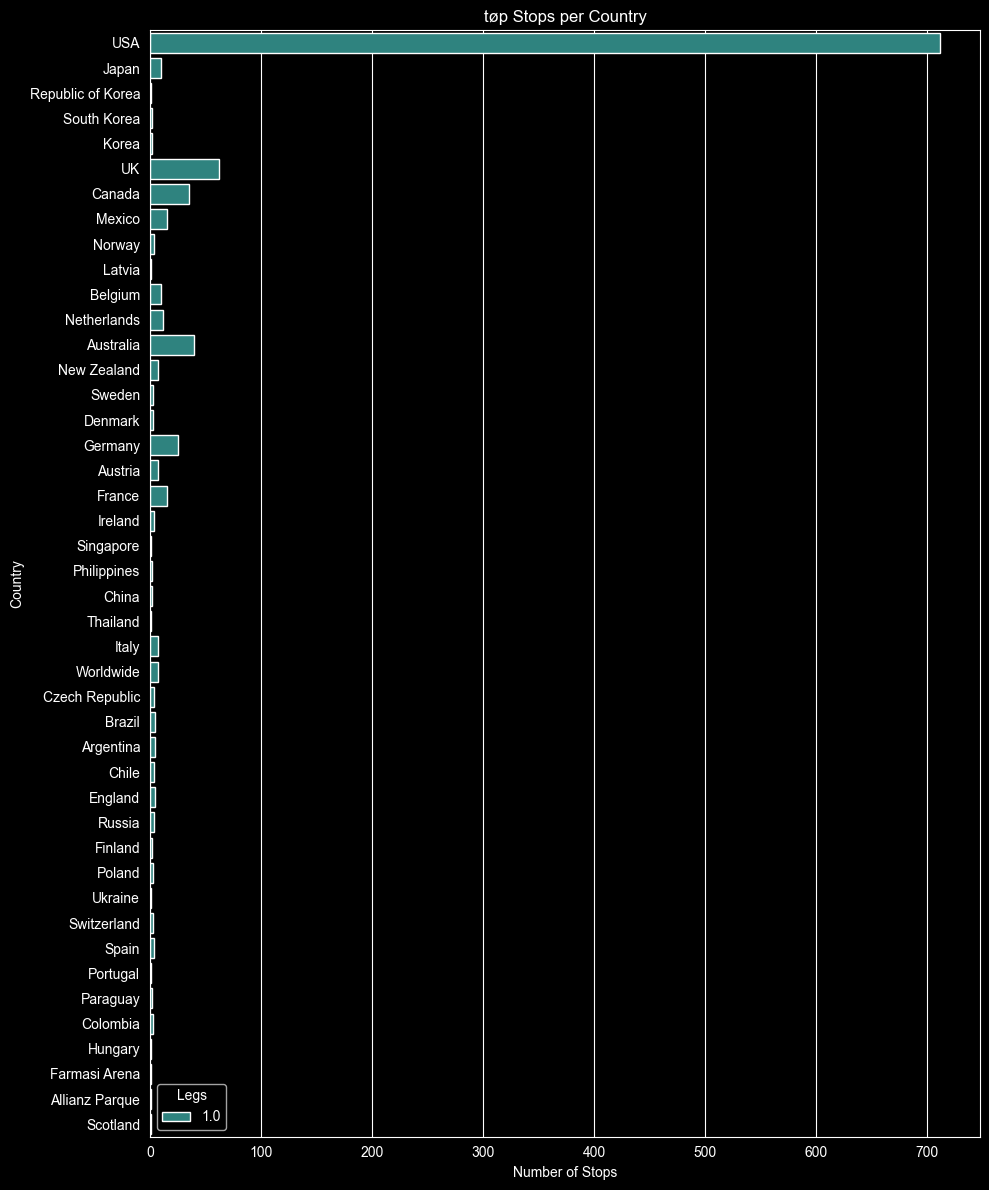

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

df1['Country'] = df1['Country'].str.strip()
# Grouping by continent and summing the population
country_stats = df1.groupby('Country')['Legs'].sum().reset_index()

print(country_stats)

# Set the figure size so the country names aren't squashed
plt.figure(figsize=(10, 12))

# Use countplot to actually count occurrences of each country
sns.countplot(data=df1, y="Country", hue = 'Legs', palette="viridis")

plt.title('tøp Stops per Country')
plt.xlabel('Number of Stops')
plt.ylabel('Country')

# Optional: Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()

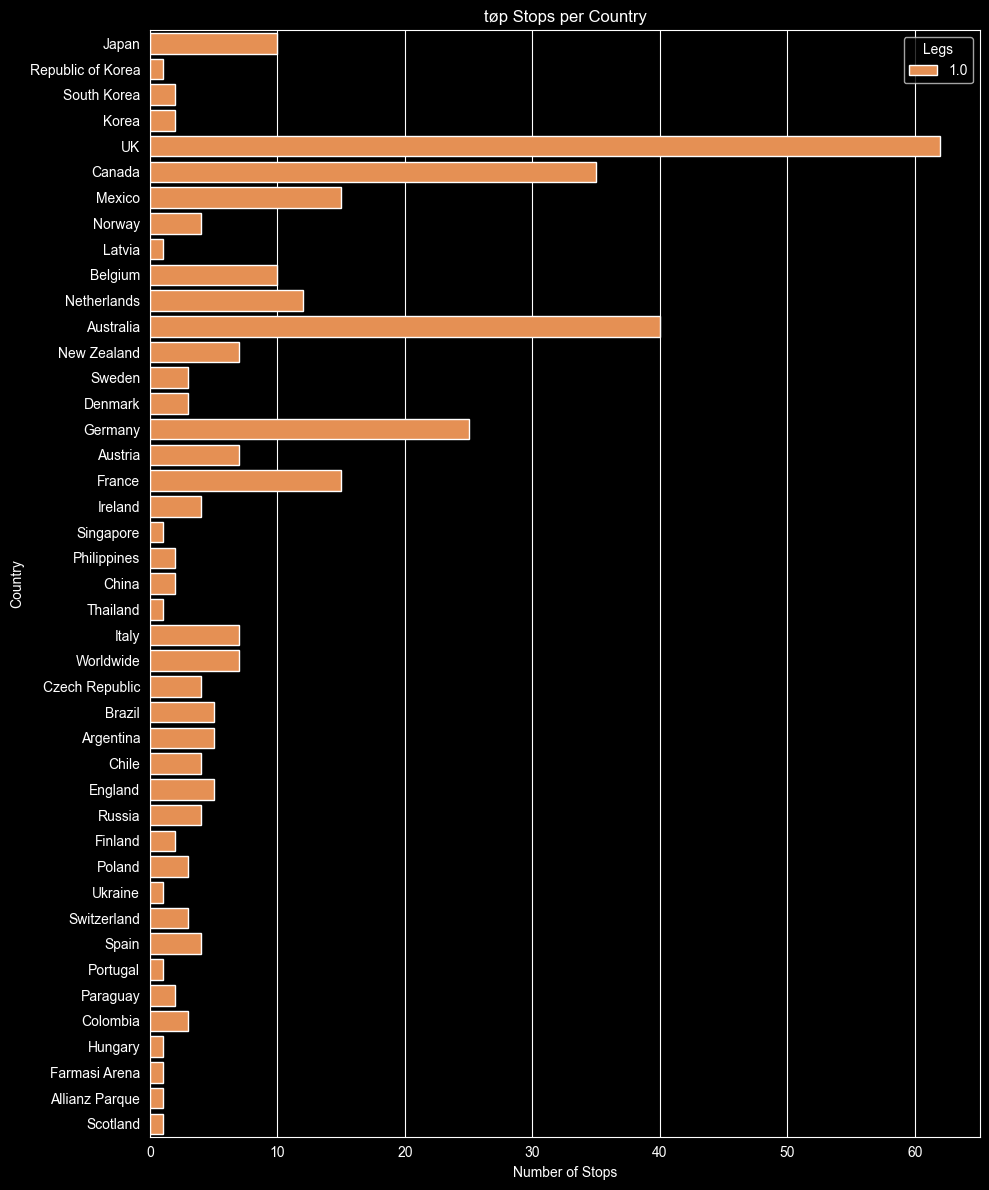

In [72]:
# Filter out a specific country
df_filtered = df1[df1['Country'] != 'USA']

# Set the figure size so the country names aren't squashed
plt.figure(figsize=(10, 12))

# Use countplot to actually count occurrences of each country
sns.countplot(data=df_filtered, y="Country", hue ='Legs', palette="YlOrRd")

plt.title('tøp Stops per Country')
plt.xlabel('Number of Stops')
plt.ylabel('Country')

# Optional: Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()

In [73]:
# Create Date and Time columns
df1["Date"] = pd.to_datetime(df1["Date"], errors='coerce')


In [74]:
df1.dtypes

Members                      object
Associated Albums            object
Date                 datetime64[ns]
Tour                         object
City                         object
State                        object
Country                      object
Continent                    object
Venue                        object
Legs                        float64
dtype: object

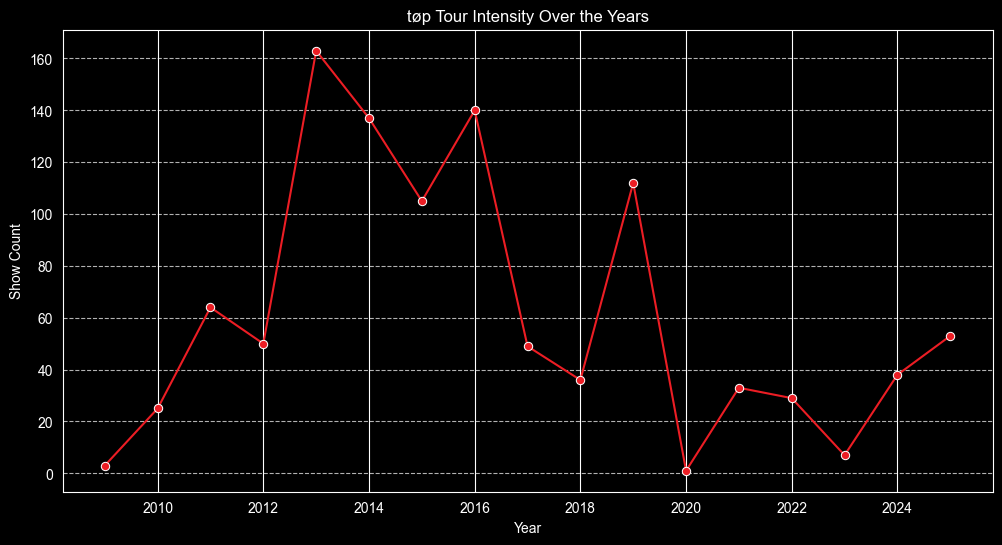

In [75]:
# Convert your date column to datetime if you haven't yet
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = df1['Date'].dt.year

plt.figure(figsize=(12, 6))
# Line plot showing the number of shows per year
sns.lineplot(data=df1.groupby('Year').size().reset_index(name='Show Count'), x='Year', y='Show Count', marker='o', color='#EC1D24')

plt.title('tøp Tour Intensity Over the Years')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

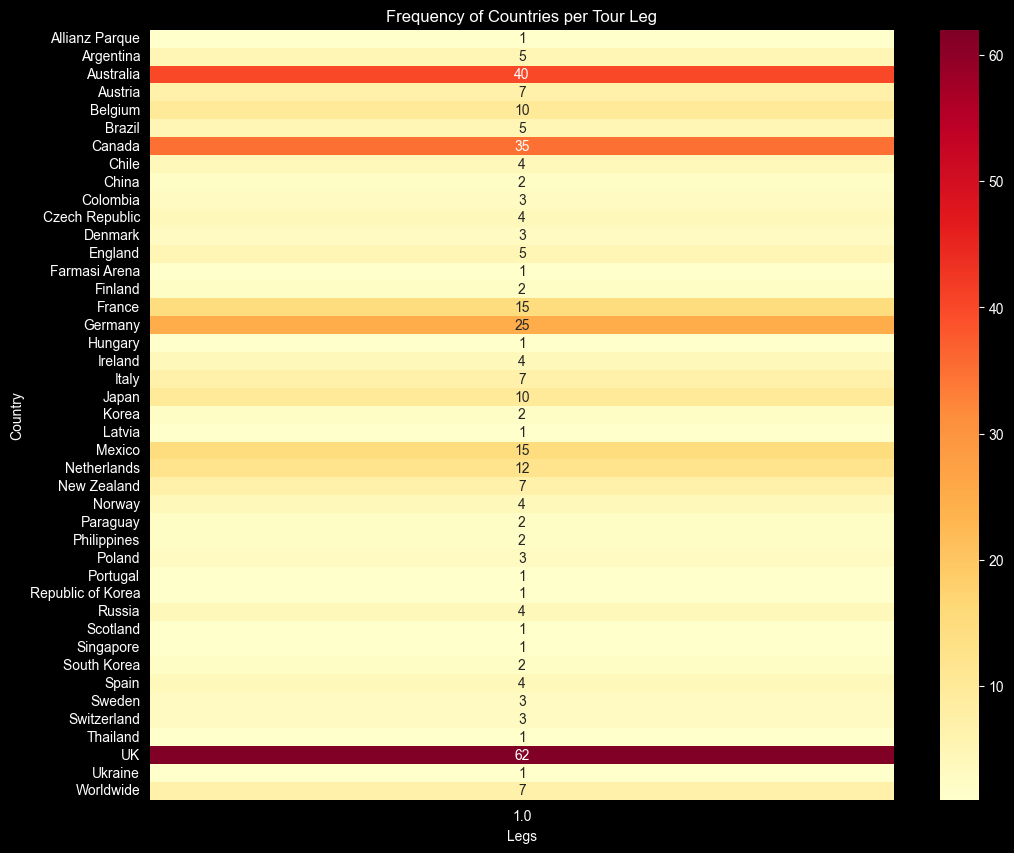

In [76]:
# Create a pivot table of Countries vs Legs
pivot_df = df_filtered.groupby(['Country', 'Legs']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_df, annot=True, cmap="YlOrRd", fmt='d')

plt.title('Frequency of Countries per Tour Leg')
plt.show()

/Users/meredithsmith/PycharmProjects/PythonProject/PythonProject/PythonProject58/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 9 (	) missing from font(s) Arial.



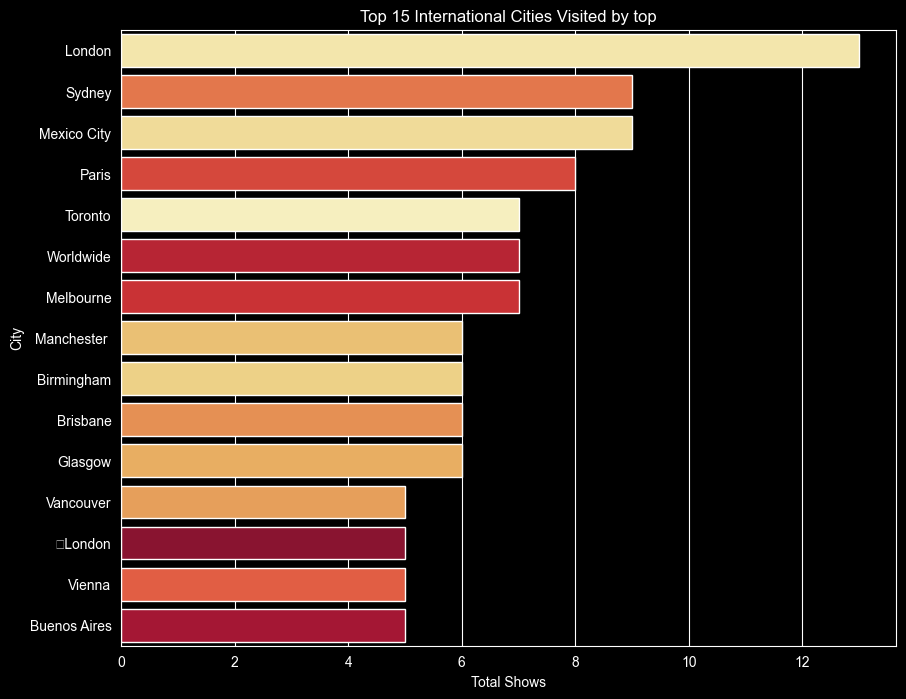

In [77]:
# Get top 15 cities excluding the US
top_cities = df_filtered['City'].value_counts().nlargest(15).index
df_top_cities = df_filtered[df_filtered['City'].isin(top_cities)]

plt.figure(figsize=(10, 8))
sns.countplot(data=df_top_cities, y='City', order=top_cities, hue = 'City',palette="YlOrRd")

plt.title('Top 15 International Cities Visited by top')
plt.xlabel('Total Shows')
plt.show()

In [78]:
# Use .copy() to create a dedicated DataFrame
df_usa = df1[df1['Country'] == 'USA'].copy()

# Now this operation will not trigger a warning
df_usa['State'] = df_usa['State'].str.strip()

In [79]:
import nbformat as nbf
import plotly.express as px
import ipywidgets as widgets

# Count the occurrences of each state
state_counts = df_usa['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# Create an interactive map
fig = px.choropleth(state_counts,
                    locations='State',
                    locationmode="USA-states",
                    color='Count',
                    scope="usa",
                    title='tøp Tour Stop Counts by State')
fig.show()

In [80]:
import nbformat as nbf
import plotly.express as px
import ipywidgets as widgets

# Count the occurrences of each state
country_counts = df_filtered['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'CCount']

# Create an interactive map
fig = px.choropleth(country_counts,
                    locations='Country',
                    locationmode='country names',
                    color='CCount',
                    title='tøp Tour Stop Counts by Country')
fig.show()

/var/folders/b3/c2r9247s37z1czpqz37hrcd40000gn/T/ipykernel_9458/4237904682.py:10: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



In [81]:
df.head()

,Members,Associated Albums,Date,Tour,Unnamed: 4,City,State,Country,Continent,Venue,Suffix,Legs,Lineup,Signed Under,Unnamed: 14
0,"Tyler Joseph, Nick Thomas, Chris Salih",NaN,2009-07-08 00:00:00,NaN,NaN,Columbus,OH,USA,North America,Expresso Yourself Music Café,NaN,1.0,NaN,NaN,NaN
1,"Tyler Joseph, Nick Thomas, Chris Salih",NaN,2009-10-11 00:00:00,NaN,NaN,Columbus,OH,USA,North America,Battle of the Bands at the Alrosa Villa,NaN,1.0,NaN,NaN,NaN
2,"Tyler Joseph, Nick Thomas, Chris Salih",NaN,2009-12-29 00:00:00,NaN,NaN,Columbus,OH,USA,North America,The Basement,NaN,1.0,NaN,NaN,NaN
3,"Tyler Joseph, Nick Thomas, Chris Salih",Twenty Øne Pilots (Self-Titled),2010-01-16 00:00:00,NaN,NaN,Columbus,OH,USA,North America,Newport Music Hall,NaN,1.0,NaN,NaN,NaN
4,"Tyler Joseph, Nick Thomas, Chris Salih",Twenty Øne Pilots (Self-Titled),2010-02-19 00:00:00,NaN,NaN,Columbus,OH,USA,North America,Newport Music Hall,NaN,1.0,NaN,NaN,NaN


In [82]:
print(df.columns)

Index(['Members', 'Associated Albums', 'Date', 'Tour', 'Unnamed: 4', 'City ',
       'State', 'Country', 'Continent', 'Venue', 'Suffix', 'Legs', 'Lineup',
       'Signed Under', 'Unnamed: 14'],
      dtype='object')


In [83]:
df1=df.copy()

# Combine columns 'Col1', 'Col2', and 'Col3' with a comma and space
# Note: astype(str) is used to ensure numerical columns don't cause errors
df1['location_string'] = df1['City '].astype(str) + ', ' + df1['State'].astype(str) + ', ' + df1['Country'].astype(str)

print(df_geo)

             location_string   latitude   longitude
0          Columbus, OH, USA  39.962260  -83.000707
1         Kettering, OH, USA  39.689504  -84.168827
2         Cleveland, OH, USA  41.499657  -81.693677
3            Canton, OH, USA  40.798546  -81.374951
4        Middletown, OH, USA  39.516644  -84.404173
..                       ...        ...         ...
400    \tAlpharetta, GA, USA  34.075596  -84.294596
401  \tBirmingham\t, AL, USA  33.520682  -86.802433
402        \tRogers, AR, USA  36.334857  -94.119382
403      \tDallas\t, TX, USA  32.776272  -96.796856
404   \tChula Vista, CA, USA  32.640054 -117.084195

[405 rows x 3 columns]


In [84]:
df1.head()

,Members,Associated Albums,Date,Tour,Unnamed: 4,City,State,Country,Continent,Venue,Suffix,Legs,Lineup,Signed Under,Unnamed: 14,location_string
0,"Tyler Joseph, Nick Thomas, Chris Salih",NaN,2009-07-08 00:00:00,NaN,NaN,Columbus,OH,USA,North America,Expresso Yourself Music Café,NaN,1.0,NaN,NaN,NaN,"Columbus, OH, USA"
1,"Tyler Joseph, Nick Thomas, Chris Salih",NaN,2009-10-11 00:00:00,NaN,NaN,Columbus,OH,USA,North America,Battle of the Bands at the Alrosa Villa,NaN,1.0,NaN,NaN,NaN,"Columbus, OH, USA"
2,"Tyler Joseph, Nick Thomas, Chris Salih",NaN,2009-12-29 00:00:00,NaN,NaN,Columbus,OH,USA,North America,The Basement,NaN,1.0,NaN,NaN,NaN,"Columbus, OH, USA"
3,"Tyler Joseph, Nick Thomas, Chris Salih",Twenty Øne Pilots (Self-Titled),2010-01-16 00:00:00,NaN,NaN,Columbus,OH,USA,North America,Newport Music Hall,NaN,1.0,NaN,NaN,NaN,"Columbus, OH, USA"
4,"Tyler Joseph, Nick Thomas, Chris Salih",Twenty Øne Pilots (Self-Titled),2010-02-19 00:00:00,NaN,NaN,Columbus,OH,USA,North America,Newport Music Hall,NaN,1.0,NaN,NaN,NaN,"Columbus, OH, USA"


In [85]:
df_geo.head()

,location_string,latitude,longitude
0,"Columbus, OH, USA",39.962260,-83.000707
1,"Kettering, OH, USA",39.689504,-84.168827
2,"Cleveland, OH, USA",41.499657,-81.693677
3,"Canton, OH, USA",40.798546,-81.374951
4,"Middletown, OH, USA",39.516644,-84.404173


In [86]:
import pandas as pd

# Merge df_geo into df1
# 'how='left'' ensures you keep all rows from your original df1
df_combined = pd.merge(df1, df_geo, on='location_string', how='left')

# Check the first few rows to confirm
print(df_combined.head())

                                  Members  \
0  Tyler Joseph, Nick Thomas, Chris Salih   
1  Tyler Joseph, Nick Thomas, Chris Salih   
2  Tyler Joseph, Nick Thomas, Chris Salih   
3  Tyler Joseph, Nick Thomas, Chris Salih   
4  Tyler Joseph, Nick Thomas, Chris Salih   

                      Associated Albums                 Date Tour  Unnamed: 4  \
0                                   NaN  2009-07-08 00:00:00  NaN         NaN   
1                                   NaN  2009-10-11 00:00:00  NaN         NaN   
2                                   NaN  2009-12-29 00:00:00  NaN         NaN   
3  Twenty Øne Pilots (Self-Titled)       2010-01-16 00:00:00  NaN         NaN   
4  Twenty Øne Pilots (Self-Titled)       2010-02-19 00:00:00  NaN         NaN   

      City  State Country      Continent  \
0  Columbus    OH     USA  North America   
1  Columbus    OH     USA  North America   
2  Columbus    OH     USA  North America   
3  Columbus    OH     USA  North America   
4  Columbus    OH     

In [87]:
df_combined.dtypes

Members               object
Associated Albums     object
Date                  object
Tour                  object
Unnamed: 4           float64
City                  object
State                 object
Country               object
Continent             object
Venue                 object
Suffix                object
Legs                 float64
Lineup                object
Signed Under          object
Unnamed: 14           object
location_string       object
latitude             float64
longitude            float64
dtype: object

In [88]:
# Convert to datetime and ensure it's not a boolean series
df_combined["Date"] = pd.to_datetime(df_combined["Date"], format="%m/%d/%y %H:%M", errors="coerce")

In [89]:
# Create Date and Time columns
df_combined["ShowDate"] = df_combined["Date"].dt.date
df_combined["Time"] = df_combined["Date"].dt.strftime("%H:%M")
df_combined['Time'] = pd.to_datetime(df_combined['Time'])

In [90]:
df_combined.dtypes

Members                      object
Associated Albums            object
Date                 datetime64[ns]
Tour                         object
Unnamed: 4                  float64
City                         object
State                        object
Country                      object
Continent                    object
Venue                        object
Suffix                       object
Legs                        float64
Lineup                       object
Signed Under                 object
Unnamed: 14                  object
location_string              object
latitude                    float64
longitude                   float64
ShowDate                     object
Time                 datetime64[ns]
dtype: object

In [91]:
import folium
from folium.plugins import TimestampedGeoJson

# Define Red/Orange/Yellow palette
# You can add as many hex codes as you like to get the exact look
warm_colors = {
    'Twenty Øne Pilots (Self-Titled)': '#4A0E0E', # Dark Garnet
    'Regional at Best':'#7B0828', # Deep Ruby
    'Blurryface': '#9B1B30', # Chili Pepper
    'Trench': '#B22222', # Firebrick
    'Scaled and Icy': '#C0392B', # Pomegranate
    'Clancy': '#D72638', # Crimson
    'Breach': '#E74C3C' # Alizarin
}

features = []
for _, row in df_combined.iterrows():
    # Use .get() to avoid crashing if a value is missing
    current_time = row['Time']

    feature = {
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [row['longitude'], row['latitude']], # Check if your cols are 'lon' or 'longitude'
        },
        'properties': {
            # Convert datetime to string for the GeoJSON
            'time': current_time.strftime('%Y-%m-%d') if pd.notnull(current_time) else None,
            'style': {'color': warm_colors.get(row['Associated Albums'], 'white') if row['Associated Albums'] else 'white'},
            'icon': 'circle',
            'iconstyle': {
                'fillColor': warm_colors.get(row['Associated Albums'], 'white'),
                'fillOpacity': 0.6
                #'radius': (row.get('venue_capacity', 0) / 2000) + 2 # +2 ensures tiny venues #are still visible
            }
            #'#popup': f"<b>{row.get('venue_name', 'Unknown')}</b><br>Cap: {row.get#('venue_capacity', 'N/A')}"
        }
    }
    features.append(feature)


In [92]:
import folium
from folium.plugins import TimestampedGeoJson

# 1. Define Era Colors (Matching your previous analysis)
era_colors = {
    "Twenty Øne Pilots (Self-Titled)": "#929292",
    "Vessel": "#00AEEF",
    "Blurryface": "#E21F26",
    "Trench": "#FCE300",
    "Scaled And Icy": "#FF69B4",
    "Clancy": "Orange",
    "Breach": "Red"
}

# 2. Initialize a world map
m = folium.Map(location=[39.9612, -82.9988], zoom_start=4, tiles='CartoDB dark_matter')

# Create a copy of the dataframe with only rows that have a date
df_geo_clean = df_combined.dropna(subset=['Time'])

# 3. Create GeoJSON features for the animation
features = []
for _, row in df_geo_clean.iterrows():
    feature = {
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [row['longitude'], row['latitude']],
        },
        'properties': {
            'time': row['Time'].strftime('%Y-%m-%d'),
            'style': {'color': era_colors.get(row['Associated Albums'], 'white')},
            'icon': 'circle',
            'iconstyle': {
                'fillColor': era_colors.get(row['Associated Albums'], 'white'),
                'fillOpacity': 0.6,
                #'radius': row['venue_capacity'] / 2000 # Radius scales with venue size!
            },
            #'popup': f"<b>{row['Venue']}</b><br>{row['city']}<br>Cap:
            #{row['venue_capacity']}"
        }
    }
    features.append(feature)

# 4. Add the pulse/time animation
TimestampedGeoJson(
    {'type': 'FeatureCollection', 'features': features},
    period='P1D',
    add_last_point=True,
    auto_play=True,
    loop=False,
    max_speed=1,
    loop_button=True,
    date_options='YYYY-MM-DD',
    time_slider_drag_update=True
).add_to(m)

m.save("T0P_Global_Expansion.html")

from geopy.geocoders import Nominatim
import folium
import time

geolocator = Nominatim(user_agent="my_venue_mapper")
m = folium.Map(location=[20, 0], zoom_start=2)

venues = df_combined["Venue"]

for venue in venues:
    # Truncate to the first 200 characters to prevent 414 errors
    clean_venue = str(venue)[:200].strip()
    location = geolocator.geocode(clean_venue)
    if location:
        folium.Marker(
            [location.latitude, location.longitude],
            popup=venue
        ).add_to(m)

    # Free services usually require a 1-second delay between requests
    time.sleep(10)

m.save("map.html")

from geopy.extra.rate_limiter import RateLimiter

# Initialize geocoder and the rate limiter (1 second between queries)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Apply to your dataframe to create a 'location' column
df_combined['location'] = df_combined['Venue'].apply(geocode)

# Filter out None results and map
for index, row in df_combined.dropna(subset=['location']).iterrows():
    folium.Marker(
        [row['location'].latitude, row['location'].longitude],
        popup=row['Venue']
    ).add_to(m)

m.save("map.html")

In [93]:
import pandas as pd
# 1. Filter out any rows where lat or lon is NaN
df_geo_final = df_geo_clean.dropna(subset=['latitude', 'longitude', 'Time']).copy()

# 2. (Optional but recommended) Ensure coordinates are numbers
df_geo_final = df_geo_final.copy()
df_geo_final['latitude'] = pd.to_numeric(df_geo_final['latitude'])
df_geo_final['longitude'] = pd.to_numeric(df_geo_final['longitude'])

# 3. MAPPING COLOR PALETTE: TØP Era Colors
# Define Era Colors (Matching your previous analysis)
era_colors = {
    "Twenty Øne Pilots (Self-Titled)": "#929292",
    "Vessel": "#00AEEF",
    "Blurryface": "#E21F26",
    "Trench": "#FCE300",
    "Scaled And Icy": "#FF69B4",
    "Clancy": "Orange",
    "Breach": "Red"
}

# 4. GEOJSON GENERATION
features = []
for _, row in df_geo_final.iterrows():
    feature = {
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            # GeoJSON uses [Longitude, Latitude] order
            'coordinates': [row['longitude'], row['latitude']],
        },
        'properties': {
            # Format date to string for the map slider
            'time': row['Time'].strftime('%Y-%m-%d'),
            #'style': {
                #'color': era_colors.get(row['era'], 'white'),
                #'fillOpacity': 0.6,
            },
            'icon': 'circle',
            'iconstyle': {
                'fillColor': era_colors.get(row['Associated Albums'], 'white'),
                'fillOpacity': 0.6,

        },
    }
    features.append(feature)

print(f"Successfully created {len(features)} features for the map!")

Successfully created 925 features for the map!


In [94]:
df_geo_final.to_csv('top_geo.csv', index=False)

In [95]:
# Calculate the mean lat/long for each tour era
center_of_gravity = df_geo_final.groupby('Associated Albums')[['latitude', 'longitude']].mean()

# Calculate Distance Traveled (The 'Miles' part of your project)
from geopy.distance import geodesic

def calculate_tour_miles(group):
    coords = list(zip(group['latitude'], group['longitude']))
    total_miles = 0
    for i in range(len(coords)-1):
        total_miles += geodesic(coords[i], coords[i+1]).miles
    return total_miles

tour_distances = df_geo_final.groupby('Associated Albums').apply(calculate_tour_miles)

print(tour_distances)

Associated Albums
Blurryface                              252952.827379
Breach                                    7134.506566
Clancy                                   40420.077111
Regional at Best                        355419.713576
Regional at Best Release Day                 0.000000
Scaled and Icy                           38735.359023
Trench                                  112233.249320
Twenty Øne Pilots (Self-Titled)          20446.561934
dtype: float64


/var/folders/b3/c2r9247s37z1czpqz37hrcd40000gn/T/ipykernel_9458/1207386986.py:14: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [96]:
from geopy.distance import geodesic
df_era = df_geo_final.copy()
def calculate_total_tour_distance(df_era):
    """Calculates the total distance traveled in one tour era."""
    total_miles = 0
    # Create a list of lat/long tuples
    points = list(zip(df_era['latitude'], df_era['longitude']))

    for i in range(len(points) - 1):
        start = points[i]
        end = points[i+1]

        # Ensure coordinates exist
        if all(start) and all(end):
            # Calculate distance in miles
            total_miles += geodesic(start, end).miles

    return total_miles

# Calculate distance for every era in your data
tour_mileage = df_era.groupby('Tour').apply(calculate_total_tour_distance)

print("--- Tour Mileage Comparison ---")
print(tour_mileage.sort_values(ascending=False))

--- Tour Mileage Comparison ---
Tour
The Bandito Tour                           63102.539666
Blurryface World Tour                      61499.388469
The Emotional Roadshow World Tour          43243.199092
The Clancy Tour                            40420.077111
The Quiet is Violent World Tour 2014       22231.709837
                                               ...     
Miracle on Broad Street                        0.000000
Newport Music Hall                             0.000000
Quiet is Violent EP?                           0.000000
 The Tonight Show Starring Jimmy Fallon        0.000000
 Scaled and Icy Livestream Experience          0.000000
Length: 65, dtype: float64


/var/folders/b3/c2r9247s37z1czpqz37hrcd40000gn/T/ipykernel_9458/3525560679.py:21: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [97]:
# Calculate the mean lat and long for each era
cog = df_era.groupby('Associated Albums')[['latitude', 'longitude']].mean()

# To visualize: plot these 'Centers' as larger stars on your Folium map
for era, coords in cog.iterrows():
    print(f"{era} Center of Gravity: {coords['latitude']:.2f}, {coords['longitude']:.2f}")

Blurryface Center of Gravity: 31.80, -49.56
Breach Center of Gravity: 37.19, -85.13
Clancy Center of Gravity: 29.25, -60.97
Regional at Best   Center of Gravity: 36.66, -65.99
Regional at Best Release Day Center of Gravity: 40.08, -82.81
Scaled and Icy Center of Gravity: 39.87, -83.90
Trench Center of Gravity: 34.98, -64.33
Twenty Øne Pilots (Self-Titled)      Center of Gravity: 39.74, -79.19


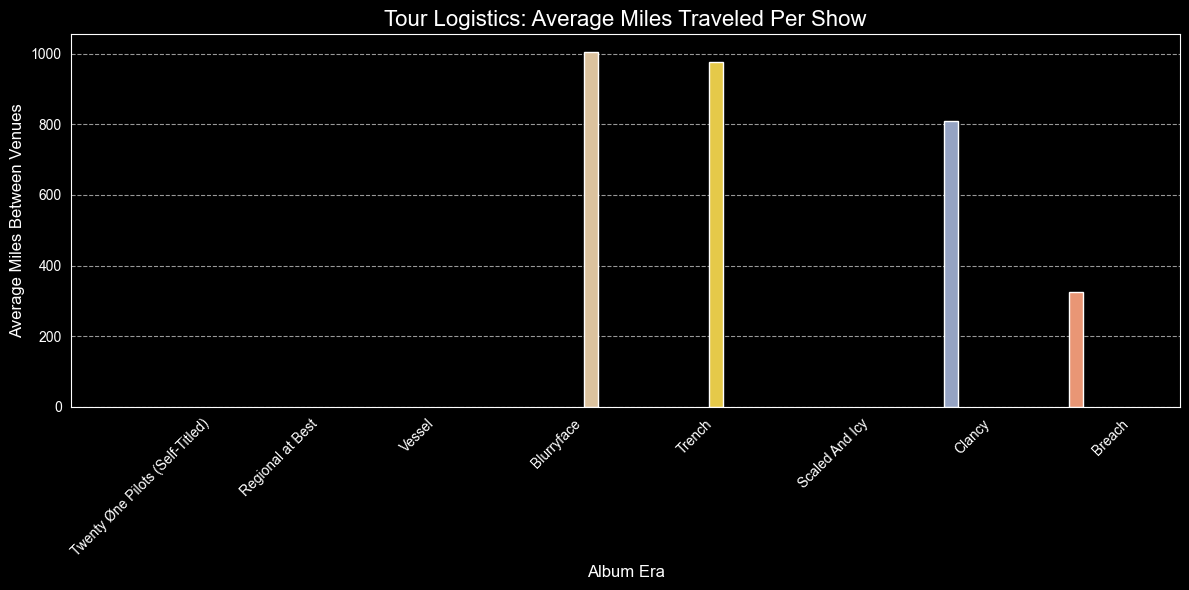

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# 1. Define the chronological order for the X-axis
era_order = [
    "Twenty Øne Pilots (Self-Titled)", "Regional at Best", "Vessel",
    "Blurryface", "Trench", "Scaled And Icy", "Clancy", "Breach"
]

def calculate_era_metrics(df_era):
    # Ensure coordinates are present and drop rows with None/NaN
    valid_coords = df_era.dropna(subset=['latitude', 'longitude'])
    points = list(zip(valid_coords['latitude'], valid_coords['longitude']))

    total_miles = 0
    for i in range(len(points) - 1):
        total_miles += geodesic(points[i], points[i+1]).miles

    num_shows = len(df_era)

    # Return 0 if no shows to avoid division by zero
    avg_miles = total_miles / num_shows if num_shows > 0 else 0
    return pd.Series({'Total_Miles': total_miles, 'Avg_Miles_Per_Show': avg_miles, 'Show_Count': num_shows})

# 2. Apply the calculation to each era
era_stats = df_era.groupby('Associated Albums').apply(calculate_era_metrics, include_groups=False).reset_index()

# 3. Ensure the order is chronological
era_stats['Associated Albums'] = pd.Categorical(era_stats['Associated Albums'], categories=era_order, ordered=True)
era_stats = era_stats.sort_values('Associated Albums')

# 4. Visualization
plt.figure(figsize=(12, 6))
sns.barplot(
    data=era_stats,
    x='Associated Albums',
    y='Avg_Miles_Per_Show',
    hue='Show_Count',
    palette=sns.color_palette('Set2', n_colors=len(era_stats)),
    order=era_order,
    legend=False
)

plt.title('Tour Logistics: Average Miles Traveled Per Show', fontsize=16)
plt.ylabel('Average Miles Between Venues', fontsize=12)
plt.xlabel('Album Era', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()